# **Caio Emanoel Serpa Lopes**
---
# **C.E.S.A.R School**
## Análise e Engenharia de Dados - Turma 2021.2
## Disciplina - Modelos Preditivos Conexionistas
## Tutor - **Vitor Casadei**

# Sobre o Projeto


`Projeto desenvolvido durante a especialização em Análise e Engenharia de Dados da CESAR School.`

Para o projeto de RNA, utilizei como modelo o algoritmo de MobileNetV2, devido a dimensão do nosso problema e por ser considerado um problema simples de classificação.

Ao decorer do projeto, você encontrará etapas de criação do modelo, criação do dataset e treinamento do modelo.

* Nosso modelo irá classificar imagens entre três diferentes animais (Leão, Cachorro e Gato).

[Documentação do modelo](https://keras.io/api/applications/mobilenet/)

# Importando Bibliotecas

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import load_model

# Importando Dataset (hospedado no ROBOFLOW)

In [2]:
!curl -L "https://app.roboflow.com/ds/PLCiS5exPa?key=Ut1vk1MeFf" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


#Movendo pastas para dentro das pastas
%cd /content/
%mkdir images_dir/
%mv train images_dir/
%mv test images_dir/
%mv valid images_dir/ 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   2776      0 --:--:-- --:--:-- --:--:--  2776
100 6752k  100 6752k    0     0  10.5M      0 --:--:-- --:--:-- --:--:-- 24.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
   creating: test/Cachorro/
 extracting: test/Cachorro/Cachorro115_jpg.rf.f8788f05b18dcd58b1e147032858aa75.jpg  
 extracting: test/Cachorro/Cachorro117_jpg.rf.0bbfe83a3237a58cdf202236c871c431.jpg  
 extracting: test/Cachorro/Cachorro23_jpg.rf.ef6ce37fbcde30ca9fa2131d4850acec.jpg  
 extracting: test/Cachorro/Cachorro32_jpg.rf.ce18c1fd7b0ef97819bc6f6ee3db61ff.jpg  
 extracting: test/Cachorro/Cachorro34_jpg.rf.9a3f1c8b6c7930eed620c821ab7e87ed.jpg  
 extracting: test/Cachorro/Cachorro51_jpg.rf.06b4a97f615e2072b71cf669379e51a1.jpg  
 extracting: test/Cachorro/Cacho

# Gerando base e Reshape para treinamento

In [3]:

train_gen = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)

test_gen = ImageDataGenerator(rescale = 1./255)



In [4]:
#gerando bases de treino e validação
train_dir = train_gen.flow_from_directory('/content/images_dir/train/',
                                        target_size = (64,64),
                                        batch_size = 64,
                                        class_mode = 'categorical')

test_dir = test_gen.flow_from_directory('/content/images_dir/test/',
                                        target_size = (64,64),
                                        batch_size = 64,
                                        class_mode = 'categorical')

val_dir = test_gen.flow_from_directory('/content/images_dir/valid/',
                                        target_size = (64,64),
                                        batch_size = 64,
                                        class_mode = 'categorical')


Found 208 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


In [5]:
model_base = MobileNetV2(input_shape=(224,224,3),    
                        include_top=False,
                        weights='imagenet')


model_base.trainable = False
model = Sequential([
    model_base,
    GlobalAveragePooling2D(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
    ])


9420800/9406464 [==============================] - 0s 0us/step


In [6]:
#Otimizador
opt = Adam(learning_rate = 0.0001)
model.compile(optimizer = opt, 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Adicinoando pesos e viés através do WANDB

In [7]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb



import sys
#aff5f62f1ae37d187c61e686708d8830fe9710a7
def wandb_colab_login():
  """Temporary hack to prevent colab from hanging"""
  sys.modules["google.colab2"] = sys.modules["google.colab"]
  del sys.modules["google.colab"]
  wandb.login()
  sys.modules["google.colab"] = sys.modules["google.colab2"]
wandb_colab_login()

     |████████████████████████████████| 1.8 MB 5.5 MB/s 
     |████████████████████████████████| 157 kB 46.8 MB/s 
     |████████████████████████████████| 181 kB 46.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 157 kB 51.5 MB/s 
     |████████████████████████████████| 157 kB 50.9 MB/s 
     |████████████████████████████████| 157 kB 50.9 MB/s 
     |████████████████████████████████| 157 kB 48.0 MB/s 
     |████████████████████████████████| 156 kB 52.5 MB/s 


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [8]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history =  model.fit(train_dir,
                    steps_per_epoch = 2,
                    epochs = 1000,
                    validation_data = val_dir,
                    callbacks=[cp_callback])

Epoch 1/1000
2/2 [==============================] - ETA: 0s - loss: 1.0496 - accuracy: 0.3750
Epoch 1: saving model to training_1/cp.ckpt
2/2 [==============================] - 9s 4s/step - loss: 1.0496 - accuracy: 0.3750 - val_loss: 0.8153 - val_accuracy: 0.4237
Epoch 2/1000
2/2 [==============================] - ETA: 0s - loss: 1.0002 - accuracy: 0.3281
Epoch 2: saving model to training_1/cp.ckpt
2/2 [==============================] - 4s 2s/step - loss: 1.0002 - accuracy: 0.3281 - val_loss: 0.7967 - val_accuracy: 0.4407
Epoch 3/1000
2/2 [==============================] - ETA: 0s - loss: 1.0473 - accuracy: 0.3594
Epoch 3: saving model to training_1/cp.ckpt
2/2 [==============================] - 3s 2s/step - loss: 1.0473 - accuracy: 0.3594 - val_loss: 0.7953 - val_accuracy: 0.4237
Epoch 4/1000
2/2 [==============================] - ETA: 0s - loss: 0.9252 - accuracy: 0.3250
Epoch 4: saving model to training_1/cp.ckpt
2/2 [==============================] - 1s 1s/step - loss: 0.9252 - acc

# Plot do Modelo 

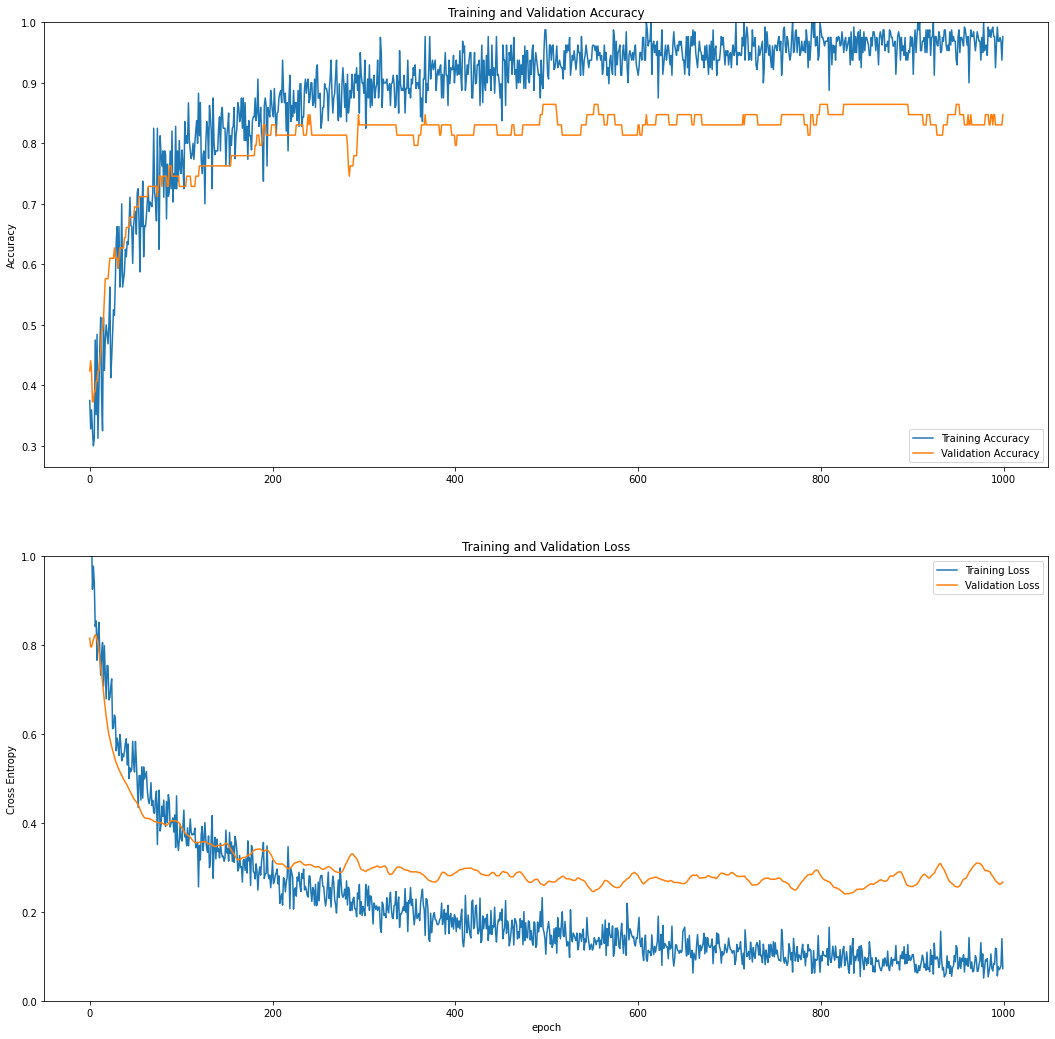

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(18, 18))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Como podemos verificar, nosso modelo em determinados momentos atinge 100% de acurácia.

Ao decorro do nosso treimaneto, podemos ver que nosso modelo perfoma bem. Diminuindo o Loss tanto em treino, quanto em validação e aumentando nossa acurácia

# Salvando o modelo

In [10]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)


2.8.2


In [12]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [13]:
# my_model directory
%ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
%ls saved_model/my_model

my_model/
assets/  keras_metadata.pb  saved_model.pb  variables/


In [14]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,422,339
Trainable params: 164,355
Non-tr

# Salvando o modelo para Depois

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!mkdir /content/drive/MyDrive/Animal_Classification/model

mkdir: cannot create directory ‘/content/drive/MyDrive/Animal_Classification/model’: No such file or directory


In [17]:
!cp -r saved_model /content/drive/MyDrive/Animal_Classification/model

cp: cannot create directory '/content/drive/MyDrive/Animal_Classification/model': No such file or directory


In [18]:
!zip -r modelo.zip saved_model/my_model/ 

  adding: saved_model/my_model/ (stored 0%)
  adding: saved_model/my_model/saved_model.pb (deflated 91%)
  adding: saved_model/my_model/keras_metadata.pb (deflated 96%)
  adding: saved_model/my_model/variables/ (stored 0%)
  adding: saved_model/my_model/variables/variables.index (deflated 75%)
  adding: saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: saved_model/my_model/assets/ (stored 0%)


In [19]:
!mkdir /content/drive/MyDrive/BananaStepps/model/weights

mkdir: cannot create directory ‘/content/drive/MyDrive/BananaStepps/model/weights’: No such file or directory


In [20]:
!cp -r /content/training_1 /content/drive/MyDrive/Animal_Classification/model/weights

cp: cannot create directory '/content/drive/MyDrive/Animal_Classification/model/weights': No such file or directory


In [21]:
!zip -r weights.zip /content/training_1

  adding: content/training_1/ (stored 0%)
  adding: content/training_1/checkpoint (deflated 38%)
  adding: content/training_1/cp.ckpt.data-00000-of-00001 (deflated 7%)
  adding: content/training_1/cp.ckpt.index (deflated 78%)


# Referências

# https://www.kaggle.com/code/sunritjana/plant-disease-detection-mobilenetv2
# https://www.kaggle.com/code/wldzia/tensorflow-using-mobilenet-v2
# https://www.kaggle.com/code/pranshu15/tensorflow-keras-mobilenetv2-77
# https://www.kaggle.com/code/abhishek123maurya/mobilenetv2-paddy-disease-classifier
# https://github.com/vcasadei/Redes-Neurais-CESAR-School/blob/2021.2/5%20-%20Redes%20Neurais%20Convolucionais/5.6-Banana_Classification_with_MobileNetV2.ipynb